In [42]:
%matplotlib inline
import RPi.GPIO as GPIO
import matplotlib.pyplot as plt
import io
import time
import picamera
import cv2
import numpy as np
import colour

def offRed():
    GPIO.output(ledPinRed1, GPIO.LOW)
    GPIO.output(ledPinRed2, GPIO.LOW)

def onRed():
    GPIO.output(ledPinRed1, GPIO.HIGH)
    GPIO.output(ledPinRed2, GPIO.HIGH)

def onBlue():
    GPIO.output(ledPinBlue1, GPIO.HIGH)
    GPIO.output(ledPinBlue2, GPIO.HIGH)
    
def offBlue():
    GPIO.output(ledPinBlue1, GPIO.LOW)
    GPIO.output(ledPinBlue2, GPIO.LOW)

ledPinRed1 = 18 #
ledPinRed2 = 12 #

ledPinBlue1 = 23 #
ledPinBlue2 = 24#

GPIO.setwarnings(False)
GPIO.setmode(GPIO.BCM) # Broadcom pin-numbering scheme

GPIO.setup(ledPinRed1, GPIO.OUT) # LED pin set as output
GPIO.setup(ledPinRed2, GPIO.OUT) # LED pin set as output
GPIO.setup(ledPinBlue1, GPIO.OUT) # LED pin set as output
GPIO.setup(ledPinBlue2, GPIO.OUT) # LED pin set as output


In [43]:
offRed()
offBlue()
onRed()
#onBlue()

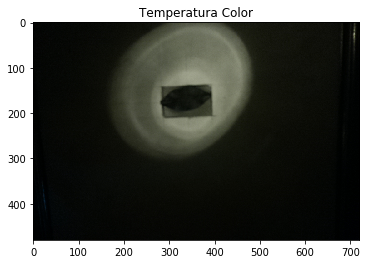

In [44]:
# Create the in-memory stream
stream = io.BytesIO()
with picamera.PiCamera() as camera:
    camera.start_preview()
    time.sleep(2)
    camera.capture(stream, format='jpeg')
# Construct a numpy array from the stream
data = np.frombuffer(stream.getvalue(), dtype=np.uint8)
# "Decode" the image from the array, preserving colour
image = cv2.imdecode(data, 1)
# OpenCV returns an array with data in BGR order. If you want RGB instead
# use the following...
image = image[:, :, ::-1]

plt.imshow(image)
plt.title('Temperatura Color')
plt.show()

In [45]:
image.shape

(480, 720, 3)

Text(0.5,1,'Temperatura Color')

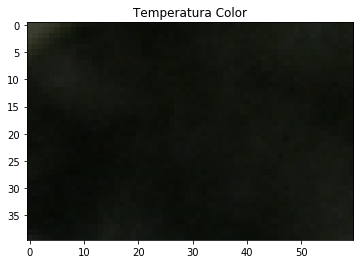

In [46]:
plt.imshow(image[150:190, 300:360])
plt.title('Temperatura Color')
#plt.show()

In [47]:
#image = image[140:220, 280:400,:]
#image.shape
image[150:190, 300:360].shape

(40, 60, 3)

In [40]:
#image[40,60,:]

In [48]:
r=image[:,:,0]
g=image[:,:,1]
b=image[:,:,2]

rp = r.sum()/(r.shape[0]*r.shape[1])
gp = g.sum()/(g.shape[0]*g.shape[1])
bp = b.sum()/(b.shape[0]*b.shape[1])

rp,gp,bp

(25.862936921296296, 27.780474537037037, 20.778854166666665)

In [49]:
# Assuming sRGB encoded colour values.
RGB = np.array([rp,gp,bp])


# Conversion to tristimulus values.
XYZ = colour.sRGB_to_XYZ(RGB /255)

# Conversion to chromaticity coordinates.
xy = colour.XYZ_to_xy(XYZ)

# Conversion to correlated colour temperature in K.
CCT = colour.temperature.xy_to_CCT_Hernandez1999(xy)
print(CCT)

5519.1973103299515
